<div align="center">
    <img src="../../Images/javeriana.PNG" width="800" height="600">
</div>

**Juan David Villate Lemus**

**José Rafael Peña Gutiérrez**

**Laura Katherine Moreno Giraldo**

**William Ricardo Fernández Garnica**


## Movie Genre Classification

Classify a movie genre based on its plot.

<img src="https://raw.githubusercontent.com/sergiomora03/AdvancedTopicsAnalytics/main/notebooks/img/moviegenre.png"
     style="float: left; margin-right: 10px;" />



### Data

Input:
- movie plot

Output:
Probability of the movie belong to each genre


### Evaluation

- 30% Report with all the details of the solution, the analysis and the conclusions. The report cannot exceed 10 pages, must be send in PDF format and must be self-contained.
- 30% Code with the data processing and models developed that support the reported results.
- 30% Presentation of no more than 15 minutes with the main results of the project.
- 10% Model performance achieved. Metric: "AUC".

• The project must be carried out in groups of 4 people.
• Use clear and rigorous procedures.
• The delivery of the project is on March 15th, 2024, 11:59 pm, through email with Github link.
• No projects will be received after the delivery time or by any other means than the one established.




### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.

See https://arxiv.org/abs/1702.01992

## Sample Submission

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [ ]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [ ]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [ ]:
import re
special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')

In [ ]:
# Revisar los valores nulos
dataTraining.replace('', np.nan, inplace=True)

# Lista de columnas a revisar
columns_to_check = ['plot', 'genres','year','title']

#  Iterar sobre cada columna y contar los valores nulos
for column in columns_to_check:
    # Contar los valores nulos en la columna
    missing_count = dataTraining[column].isnull().sum()
    print(f'Número de datos faltantes en {column}: {missing_count}')

Número de datos faltantes en plot: 0
Número de datos faltantes en genres: 0
Número de datos faltantes en year: 0
Número de datos faltantes en title: 0


In [ ]:
from collections import Counter

# Extraer todos los caracteres especiales encontrados en la columna 'genres'
all_special_characters_text_id = ''.join(dataTraining['plot'].apply(lambda x: ''.join(special_char_pattern.findall(x))))

# Contar la frecuencia de cada caracter especial
special_character_frequencies_text_id = Counter(all_special_characters_text_id)

special_character_frequencies_text_id

Counter({'-': 10466,
         '.': 46614,
         ',': 57327,
         "'": 15571,
         '"': 4776,
         '?': 1136,
         '(': 2072,
         ')': 2059,
         '!': 350,
         ':': 1112,
         '$': 246,
         'ï': 5,
         ';': 1202,
         '/': 318,
         'é': 320,
         '£': 7,
         '%': 20,
         'è': 23,
         '&': 137,
         'ʼ': 1,
         'ç': 9,
         'ú': 6,
         '¹': 2,
         'û': 2,
         'ö': 6,
         'â': 3,
         'ñ': 6,
         '¡': 1,
         'ê': 3,
         '®': 2,
         'í': 2,
         'ä': 2,
         'ø': 2,
         '=': 3,
         'ó': 4,
         'á': 5,
         'ë': 2,
         '½': 1,
         'ô': 3,
         'å': 1,
         'ò': 5,
         'à': 13,
         'ù': 5,
         '°': 1,
         'ü': 2})

In [ ]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "ï": "i",
    "£": "$",
    "à":"a",
    "è": "e",
    "ì": "i",
    "ò": "o",
    "ù": "u",
    "®": "",
    "ä": "a",
    "ë": "é",
    "ï": "i",
    "ö": "o",
    "ü": "u",
    "Bouvetøya":"Bouvet",
    " \' ":"'",
    "\'":"'",
    "¹":"'",
    "â":"a",
    "ê":"e",
    "î":"i",
    "ô":"o",
    "û":"u",
    "å": "a",
    "é": "e",
    "í": "i",
    "ó": "o",
    "ú": "u",
    "á": "a",
    "é": "e",
    "í": "i",
    "ó": "o",
    "ú": "u"
    # "'":""
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    dataTraining['plot'] = dataTraining['plot'].str.replace(old, new, regex=False)

# Verificar el reemplazo
dataTraining['plot'].head()


3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
Name: plot, dtype: object

In [ ]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "bullard\'s": "bullards",
    "world\'s":"worlds",
    "avery\'s":"averys",
    "wallet\'s":"wallets",
    "father\'s": "fathers",
    "mother\'s": "mothers",
    "brother\'s": "brothers",
    "sister\'s": "sisters",
    "haakon\'s": "haakons",
    "king\'s": "kings",
    "queen\'s": "queens",
    "family\'s": "families",
    "father\'s": "fathers",
    "mother\'s": "mothers",
    "it\'s": "its",
    "won\'t":"wont",
    "weyland\'s": "weylands",
    "didn\'t": "didnt"
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    dataTraining['plot'] = dataTraining['plot'].str.replace(old, new, regex=False)

# Verificar el reemplazo
dataTraining['plot'].head()


3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
Name: plot, dtype: object

In [ ]:
# Busca y reemplaza dos o más espacios seguidos por un solo espacio en la columna 'Text'
dataTraining['plot'] = dataTraining['plot'].str.replace(r'  +', ' ', regex=True)

# Busca y reemplaza dos comas seguidas por una sola coma en la columna 'Text'
dataTraining['plot'] = dataTraining['plot'].str.replace(r',,', ',')

# # Elimina los espacios al inicio y al final del texto en la columna 'Text'
dataTraining['plot'] = dataTraining['plot'].apply(lambda x: x.strip())

In [ ]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "one-": "1-",
    "two-": "2-",
    "three-": "3-",
    "four-": "4-",
    "five-": "5-",
    "six-": "6-",
    "seven-": "7-",
    "eight-": "8-",
    "nine-": "9-"
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    dataTraining['plot'] = dataTraining['plot'].str.replace(old, new, regex=False)

# Verificar el reemplazo
dataTraining['plot'].head()

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden , a female blackmailer with a disfig...
4704    in a friday afternoon in new york , the presid...
2582    in los angeles , the editor of a publishing ho...
Name: plot, dtype: object

In [ ]:
import re

def normalize_text(text):
    # Normalizar espacios múltiples a un solo espacio
    text = re.sub(r'\s+', ' ', text)
    # Asegurar un espacio después de los signos de puntuación (.,;:!?), si no lo hay
    text = re.sub(r'([.,;:!?])([^\s])', r'\1 \2', text)
    # Opcional: remover espacios antes de signos de puntuación
    text = re.sub(r'\s([.,;:!?])', r'\1', text)
    return text

# Aplicar la normalización al texto completo
dataTraining['plot'] = dataTraining['plot'].apply(normalize_text)

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

# Función para limpiar el texto
def clean_text(text):
    # Convertir en minúsculas
    text = text.lower()
    return text

# Aplicar la función de limpieza a la columna de trama de tus DataFrames
dataTraining['plot'] = dataTraining['plot'].apply(clean_text)
dataTesting['plot'] = dataTesting['plot'].apply(clean_text)


In [ ]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden, a female blackmailer with a disfigu...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york, the preside...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles, the editor of a publishing hou...","['Action', 'Crime', 'Thriller']",6.6


Lematizacion

In [ ]:
pip install spacy

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import re

def corregir_espacios_s(texto):
    # Patrón para identificar " palabra s "
    patron = r"\b(\w+)\s+s\b"
    # Reemplazar con "palabra's"
    texto_corregido = re.sub(patron, r"\1's", texto)
    return texto_corregido

# Aplicar la función a la columna 'plot'
dataTraining['plot'] = dataTraining['plot'].apply(corregir_espacios_s)

In [ ]:
# Reemplazar apóstrofes en la columna "plot"
dataTraining['plot'] = dataTraining['plot'].str.replace("'", "")

In [ ]:
# Reemplazar patrones de apóstrofe seguidos por un espacio con una cadena vacía
dataTraining['plot'] = dataTraining['plot'].str.replace("\s's", "")

# Si también deseas manejar casos sin espacio antes del 's
dataTraining['plot'] = dataTraining['plot'].str.replace("'s", "")

# Verificar los cambios en algunos ejemplos
print(dataTraining['plot'].head())


<ipython-input-21-cc7fe36ba542>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataTraining['plot'] = dataTraining['plot'].str.replace("\s's", "")


3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden, a female blackmailer with a disfigu...
4704    in a friday afternoon in new york, the preside...
2582    in los angeles, the editor of a publishing hou...
Name: plot, dtype: object


In [ ]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "u. s.": "u.s.",
    "dr. t. ": "dr.",
    "!!": "!",
    "_": " "
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    dataTraining['plot'] = dataTraining['plot'].str.replace(old, new, regex=False)

# Verificar el reemplazo
dataTraining['plot'].head()

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden, a female blackmailer with a disfigu...
4704    in a friday afternoon in new york, the preside...
2582    in los angeles, the editor of a publishing hou...
Name: plot, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Necesario para tokenizar palabras

# Definir la lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenizar el texto
    words = word_tokenize(text)
    # Eliminar stopwords y unir las palabras restantes
    filtered_text = ' '.join([word for word in words if word.lower() not in stop_words])
    return filtered_text

# Aplicar la función de eliminación de stopwords a la columna 'plot'
dataTraining['plot'] = dataTraining['plot'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import spacy
from tqdm import tqdm
nlp = spacy.load('en_core_web_lg')

def lematizar_texto(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc]
    return ' '.join(lemas)

# Aplicar la función a la columna "plot" con una barra de progreso
tqdm.pandas()
dataTraining['plot'] = dataTraining['plot'].progress_apply(lematizar_texto)


100%|██████████| 7895/7895 [03:29<00:00, 37.62it/s]


In [ ]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,story single father take eight year - old son ...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,serial killer decide teach secret satisfy care...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"sweden , female blackmailer disfigure facial s...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"friday afternoon new york , president tredway ...",['Drama'],7.4
2582,1990,Narrow Margin,"los angeles , editor publish house carol hunni...","['Action', 'Crime', 'Thriller']",6.6


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Necesario para tokenizar palabras

# Definir la lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenizar el texto
    words = word_tokenize(text)
    # Eliminar stopwords y unir las palabras restantes
    filtered_text = ' '.join([word for word in words if word.lower() not in stop_words])
    return filtered_text

# Aplicar la función de eliminación de stopwords a la columna 'plot'
dataTraining['plot'] = dataTraining['plot'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Mostrar el DataFrame resultante
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,story single father take eight year - old son ...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,serial killer decide teach secret satisfy care...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"sweden , female blackmailer disfigure facial s...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"friday afternoon new york , president tredway ...",['Drama'],7.4
2582,1990,Narrow Margin,"los angeles , editor publish house carol hunni...","['Action', 'Crime', 'Thriller']",6.6


In [ ]:
import pandas as pd
from ast import literal_eval

# Convertir los strings de géneros a listas si están en formato de string
dataTraining['genres'] = dataTraining['genres'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

# Obtener un conjunto único de géneros
generos_unicos = set()
for lista_generos in dataTraining['genres']:
    generos_unicos.update(lista_generos)

# Imprimir los géneros únicos
print(generos_unicos)


{'Documentary', 'Short', 'Family', 'Adventure', 'Thriller', 'Action', 'Comedy', 'Animation', 'Music', 'Film-Noir', 'Fantasy', 'Romance', 'Drama', 'Crime', 'Sport', 'History', 'News', 'Biography', 'Horror', 'Western', 'Musical', 'War', 'Mystery', 'Sci-Fi'}


In [ ]:
import pandas as pd
import re

def corregir_guiones(texto):
    # Reemplazar secuencias de "- -" por "-"
    texto_corregido = re.sub(r"- -", "-", texto)
    # Reemplazar "a$$" por "ass"
    texto_corregido = re.sub(r"a\$\$", "ass", texto_corregido)
    return texto_corregido

# Aplicar la función a la columna 'plot'
dataTraining['plot'] = dataTraining['plot'].apply(corregir_guiones)

In [ ]:
import pandas as pd
import re

def corregir_puntos_variados(texto):
    # Identificar y corregir secuencias variadas de puntos y espacios
    texto_corregido = re.sub(r"(\.(\s*\.){2,}\s*)|(\.{3,})", ".", texto)
    return texto_corregido

# Aplicar la función a la columna 'plot'
dataTraining['plot'] = dataTraining['plot'].apply(corregir_puntos_variados)

# Verificar los cambios en algunos ejemplos
print(dataTraining['plot'].head())

3107    story single father take eight year - old son ...
900     serial killer decide teach secret satisfy care...
6724    sweden , female blackmailer disfigure facial s...
4704    friday afternoon new york , president tredway ...
2582    los angeles , editor publish house carol hunni...
Name: plot, dtype: object


In [ ]:
import re

def ajustar_puntuacion(texto):
    # Asegurar que no haya espacio antes de los signos de puntuación
    texto = re.sub(r"\s+([,.;:!?%])", r"\1", texto)
    # Asegurar que haya un espacio después de los signos de puntuación si no lo hay
    texto = re.sub(r"([,.])([^\s])", r"\1 \2", texto)
    return texto

# Aplicar la función a cada texto en la columna 'plot'
dataTraining['plot'] = dataTraining['plot'].apply(ajustar_puntuacion)

# Verificar los cambios
print(dataTraining['plot'])

3107    story single father take eight year - old son ...
900     serial killer decide teach secret satisfy care...
6724    sweden, female blackmailer disfigure facial sc...
4704    friday afternoon new york, president tredway c...
2582    los angeles, editor publish house carol hunnic...
                              ...                        
8417    ` ` marriage, wedding. ` ` lesson number one n...
1592    wander barbarian, conan, alongside goofy rogue...
1723    like tale spin scheherazade, kismet follow rem...
7605    mrs. brisby, widow mouse, live cinder block ch...
215     tinker bell journey far north never land patch...
Name: plot, Length: 7895, dtype: object


In [ ]:
import re

def limpiar_texto(texto):
    # Eliminar las comillas dobles
    texto_sin_comillas = texto.replace('"', '')
    # Reducir múltiples espacios a uno solo
    texto_espacios_reducidos = re.sub(r'\s{2,}', ' ', texto_sin_comillas)
    # Eliminar espacios al inicio y al final
    texto_final = texto_espacios_reducidos.strip()
    return texto_final

# Aplicar la función a la columna 'plot'
dataTraining['plot'] = dataTraining['plot'].apply(limpiar_texto)

**Vectorización TF-IDF**

- Utiliza TfidfVectorizer para convertir el texto de las tramas (plot) en una matriz de características TF-IDF, limitando el número de características a 50,000. Este proceso transforma el texto en un conjunto de características numéricas que representan la importancia de las palabras en el contexto de los documentos.

**Preparación de las Etiquetas de Género**
- Asegura que los géneros estén en un formato de lista de listas, convirtiendo strings a listas si es necesario.
-  Utiliza MultiLabelBinarizer para convertir las etiquetas de género en un formato binario adecuado para la clasificación multietiqueta, donde cada género se representa con una columna y las películas con ese género tienen un 1 en la columna correspondiente.

**División de Datos**
- Divide los datos en conjuntos de entrenamiento y prueba usando train_test_split, reservando el 20% de los datos para prueba.

**Construcción y Entrenamiento del Modelo**
- Define un clasificador utilizando OneVsRestClassifier con un RandomForestClassifier como el estimador base. Esta estrategia permite tratar cada etiqueta de género como un problema de clasificación binaria independiente, mejorando la capacidad del modelo para manejar múltiples etiquetas.
- Configura el RandomForestClassifier con un conjunto específico de hiperparámetros que presumiblemente han sido optimizados previamente.
- Entrena el clasificador en el conjunto de entrenamiento.

**Evaluación del Modelo**
- Realiza predicciones sobre el conjunto de prueba.
- Calcula el AUC ROC score utilizando roc_auc_score, eligiendo el promedio macro para tratar todas las clases igualmente, independientemente de su desbalance. El AUC ROC es una métrica para evaluar cómo de bien el modelo distingue entre las clases.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

# Vectorizacion
vect = TfidfVectorizer(max_features=50000)
X_dtm = vect.fit_transform(dataTraining['plot'])

# Asegurarse de que los géneros están en formato de lista de listas
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x) if isinstance(x, str) else x)

# Utilizar MultiLabelBinarizer para transformar las etiquetas de género
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.20, random_state=40)

# Definir y entrenar el clasificador con los mejores hiperparámetros encontrados
clf = OneVsRestClassifier(RandomForestClassifier(
    bootstrap=False,
    ccp_alpha=0.0020901614058249,
    class_weight='balanced',
    criterion='entropy',
    max_depth=16,
    max_features='sqrt',
    max_leaf_nodes=130,
    min_impurity_decrease=0.000794241500058106,
    min_samples_leaf=6,
    min_samples_split=13,
    n_estimators=698,
    random_state=42
))

clf.fit(X_train, y_train_genres)

# Realizar predicciones en el conjunto de prueba
y_pred_genres = clf.predict_proba(X_test)

# Calcular y mostrar el AUC ROC score
auc_score = roc_auc_score(y_test_genres, y_pred_genres, average='macro')
print(f"ROC AUC Score: {auc_score}")


ROC AUC Score: 0.8733742500387098


In [ ]:
# Realizar predicciones en el conjunto de prueba con el modelo
y_pred_genres_prob = clf.predict_proba(X_test)

# Calcular el AUC ROC score micro
auc_score_micro = roc_auc_score(y_test_genres, y_pred_genres_prob, average='micro')
print(f"ROC AUC Score (micro): {auc_score_micro}")

# Calcular el AUC ROC score macro
auc_score_macro = roc_auc_score(y_test_genres, y_pred_genres_prob, average='macro')
print(f"ROC AUC Score (macro): {auc_score_macro}")


ROC AUC Score (micro): 0.901401739330264
ROC AUC Score (macro): 0.8733742500387098


<ipython-input-51-0ef7283d2f25>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


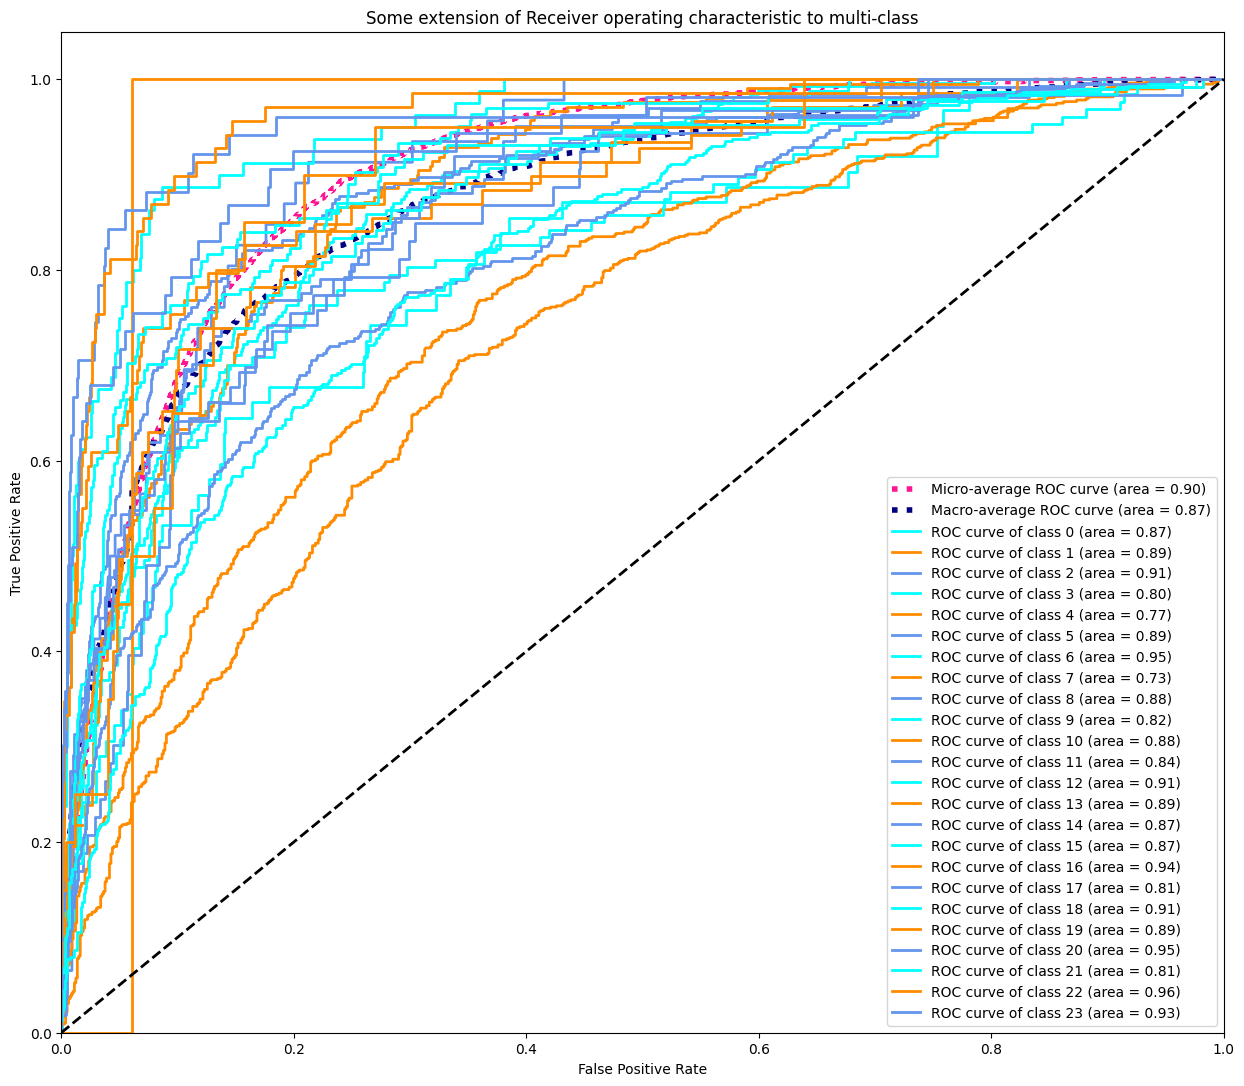

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

# Calcular las curvas ROC y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_genres.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_genres[:, i], y_pred_genres[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el micro-average ROC curve y ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_genres.ravel(), y_pred_genres.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Calcular el macro-average ROC curve y ROC area

# Primero agregamos todas las falsas tasas positivas
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Luego interpolamos todas las curvas ROC en este punto
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finalmente promediamos y calculamos AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Graficar
plt.figure(figsize=(15, 13))
lw = 2

# Graficar la curva ROC micro-average
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Graficar la curva ROC macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

# Graficar las curvas ROC para cada clase
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
